In [8]:
# necessary imports for the notebook
import pandas as pd
# renc: to fix a bug before pandas_datareader 0.7
# https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas.io.data #renc: replace by pandas_datareader
# >conda install -c anaconda pandas-datareader
from pandas_datareader import data as pdr
# >pip install fix_yahoo_finance --upgrade --no-cache-dir
import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

import numpy as np
import datetime
import matplotlib.pyplot as plt
# do all our graphics inline
%matplotlib inline
# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 78) 
pd.set_option('precision', 3)

# Obtaining historical stock and index data

## Fetching stock data from Yahoo! 

In [9]:
# request the previous three years of data for MSFT
# 2012 through 2014
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)

# get data for MSFT
#msft = pd.io.data.DataReader('MSFT', "yahoo", start, end) # renc, pd.io.data replace by pandas_datareader
#msft = pdr.DataReader('MSFT', "yahoo", start, end)
# renc, get exception Yahoo Daily deprecated.

msft = pd.read_csv('msft.csv')

In [10]:
aapl = pd.read_csv('aapl.csv')

In [11]:
msft[0:5], aapl[:5]

(         Date   Open   High    ...      Close    Volume  Adj Close
 0  2012-01-03  26.55  26.96    ...      26.77  64731500     24.422
 1  2012-01-04  26.82  27.47    ...      27.40  80516100     24.997
 2  2012-01-05  27.38  27.73    ...      27.68  56081400     25.252
 3  2012-01-06  27.53  28.19    ...      28.11  99455500     25.644
 4  2012-01-09  28.05  28.10    ...      27.74  59706800     25.307
 
 [5 rows x 7 columns],
          Date    Open    High    ...       Close    Volume  Adj Close
 0  2012-01-03  409.40  412.50    ...      411.23  75555200     55.414
 1  2012-01-04  410.00  414.68    ...      413.44  65005500     55.711
 2  2012-01-05  414.95  418.55    ...      418.03  67817400     56.330
 3  2012-01-06  419.77  422.75    ...      422.40  79573200     56.919
 4  2012-01-09  425.50  427.75    ...      421.73  98506100     56.829
 
 [5 rows x 7 columns])

In [12]:
msft = msft.set_index('Date')
aapl = aapl.set_index('Date')
msft.head(), aapl.head()

(             Open   High    Low  Close    Volume  Adj Close
 Date                                                       
 2012-01-03  26.55  26.96  26.39  26.77  64731500     24.422
 2012-01-04  26.82  27.47  26.78  27.40  80516100     24.997
 2012-01-05  27.38  27.73  27.29  27.68  56081400     25.252
 2012-01-06  27.53  28.19  27.53  28.11  99455500     25.644
 2012-01-09  28.05  28.10  27.72  27.74  59706800     25.307,
               Open    High     Low   Close    Volume  Adj Close
 Date                                                           
 2012-01-03  409.40  412.50  409.00  411.23  75555200     55.414
 2012-01-04  410.00  414.68  409.28  413.44  65005500     55.711
 2012-01-05  414.95  418.55  412.67  418.03  67817400     56.330
 2012-01-06  419.77  422.75  419.22  422.40  79573200     56.919
 2012-01-09  425.50  427.75  421.35  421.73  98506100     56.829)

In [20]:
tickers = ['AAPL', 'MSFT']
df1 = pd.concat([aapl, msft])
df1.sort_index().head() 
# renc, the result shows it mix the aapl and msft data

              Open    High     Low   Close    Volume  Adj Close
Date                                                           
2012-01-03  409.40  412.50  409.00  411.23  75555200     55.414
2012-01-03   26.55   26.96   26.39   26.77  64731500     24.422
2012-01-04  410.00  414.68  409.28  413.44  65005500     55.711
2012-01-04   26.82   27.47   26.78   27.40  80516100     24.997
2012-01-05  414.95  418.55  412.67  418.03  67817400     56.330

In [21]:
df2 = pd.concat([aapl, msft], keys=['AAPL', 'MSFT'])
df2.sort_index().head() 
# renc, looks like the keys will group the data

                   Open    High     Low   Close    Volume  Adj Close
     Date                                                           
AAPL 2012-01-03  409.40  412.50  409.00  411.23  75555200     55.414
     2012-01-04  410.00  414.68  409.28  413.44  65005500     55.711
     2012-01-05  414.95  418.55  412.67  418.03  67817400     56.330
     2012-01-06  419.77  422.75  419.22  422.40  79573200     56.919
     2012-01-09  425.50  427.75  421.35  421.73  98506100     56.829

In [22]:
df3 = pd.concat([aapl, msft], keys=['AAPL', 'MSFT'], names=['CompName', 'Date'])
df3.sort_index().head() 

                       Open    High     Low   Close    Volume  Adj Close
CompName Date                                                           
AAPL     2012-01-03  409.40  412.50  409.00  411.23  75555200     55.414
         2012-01-04  410.00  414.68  409.28  413.44  65005500     55.711
         2012-01-05  414.95  418.55  412.67  418.03  67817400     56.330
         2012-01-06  419.77  422.75  419.22  422.40  79573200     56.919
         2012-01-09  425.50  427.75  421.35  421.73  98506100     56.829

In [13]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        #return pd.io.data.DataReader(ticker, 'yahoo', 
        #                             start, end)
        # renc: change to return the dataframe read locally 
        if ticker == 'AAPL':
            return aapl
        if ticker == 'MSFT':
            return msft
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

In [23]:
# get data for the following stocks
#tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
#all_data = get(tickers, start, end)
# renc: fail to reach yahoo to get data, so i load the data locally
tickers = ['AAPL', 'MSFT']
all_data = get(tickers, start, end)
all_data[:5]
# renc, be careful, the df aapl and df msft should use Date as index before this operation,
# otherwise, you df does not look like:
#
#                      Open    High     Low   Close    Volume  Adj Close
# Ticker Date                                                           
# aapl   2012-01-03  409.40  412.50  409.00  411.23  75555200     55.414
#        2012-01-04  410.00  414.68  409.28  413.44  65005500     55.711
#        2012-01-05  414.95  418.55  412.67  418.03  67817400     56.330
#        2012-01-06  419.77  422.75  419.22  422.40  79573200     56.919
#        2012-01-09  425.50  427.75  421.35  421.73  98506100     56.829


                     Open    High     Low   Close    Volume  Adj Close
Ticker Date                                                           
AAPL   2012-01-03  409.40  412.50  409.00  411.23  75555200     55.414
       2012-01-04  410.00  414.68  409.28  413.44  65005500     55.711
       2012-01-05  414.95  418.55  412.67  418.03  67817400     56.330
       2012-01-06  419.77  422.75  419.22  422.40  79573200     56.919
       2012-01-09  425.50  427.75  421.35  421.73  98506100     56.829

## Fetching Index data from Yahoo!

In [48]:
# get daily S&P500 info
#sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
#sp_500[:5]

# renc:
sp_500 = pd.read_csv("sp500.csv") 
sp_500.head(), sp_500.columns

(  Symbol                 Name                  Sector  \
 0    MMM               3M Co.             Industrials   
 1    ABT  Abbott Laboratories             Health Care   
 2   ABBV          AbbVie Inc.             Health Care   
 3    ACN            Accenture  Information Technology   
 4    ACE          ACE Limited              Financials   
 
                          ...                          Price/Sales  \
 0                        ...                                 2.95   
 1                        ...                                 2.74   
 2                        ...                                 4.48   
 3                        ...                                 1.75   
 4                        ...                                 1.79   
 
    Price/Book                                        SEC Filings  
 0        5.26  http://www.sec.gov/cgi-bin/browse-edgar?action...  
 1        2.55  http://www.sec.gov/cgi-bin/browse-edgar?action...  
 2       18.16  http://w

# Visualizing financial time series data

## Plotting closing prices

In [24]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

  Ticker        Date  Adj Close
0   AAPL  2012-01-03     55.414
1   AAPL  2012-01-04     55.711
2   AAPL  2012-01-05     56.330
3   AAPL  2012-01-06     56.919
4   AAPL  2012-01-09     56.829

In [50]:
# now pivot Date to the index, Ticker values to columns
daily_close_px = just_closing_prices.pivot('Date', 
                                           'Ticker', 
                                           'Adj Close')
daily_close_px[:5]

Ticker        AAPL    MSFT
Date                      
2012-01-03  55.414  24.422
2012-01-04  55.711  24.997
2012-01-05  56.330  25.252
2012-01-06  56.919  25.644
2012-01-09  56.829  25.307

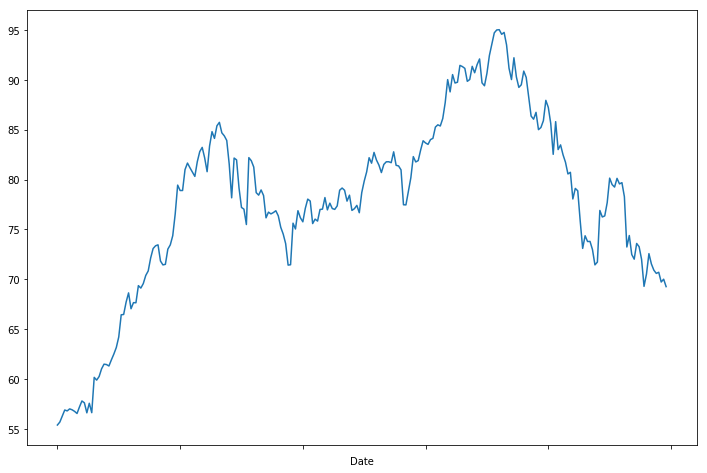

In [52]:
# plot AAPL
_ = daily_close_px['AAPL'].plot(figsize=(12,8));
plt.savefig('5104OS_05_01.png', bbox_inches='tight', dpi=300)

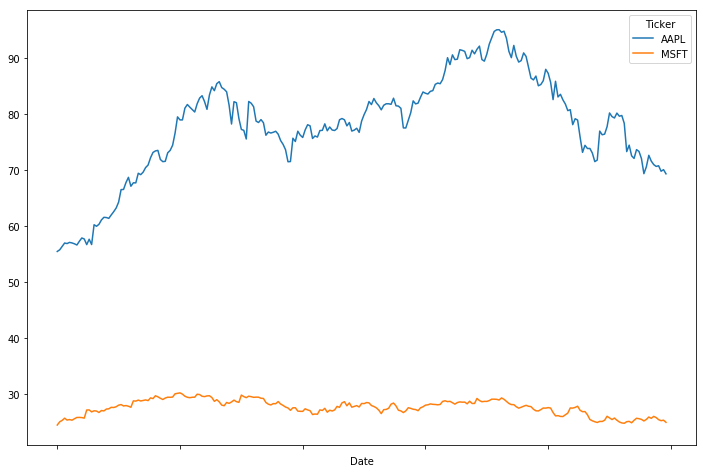

In [53]:
# plot all the stock closing prices against each other
_ = daily_close_px.plot(figsize=(12,8));
plt.savefig('5104OS_05_02.png', bbox_inches='tight', dpi=300)

## Plotting volumes series data

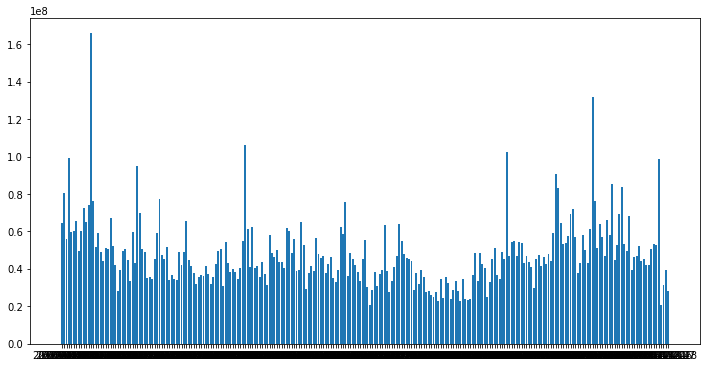

In [54]:
# get the daily volumes for MSFT
msftV = all_data.Volume.loc['MSFT']
# plot it
plt.bar(msftV.index, msftV)
# and set the plot size
plt.gcf().set_size_inches(12,6)
plt.savefig('5104OS_05_03.png', bbox_inches='tight', dpi=300)

## Combined Price and Volumes

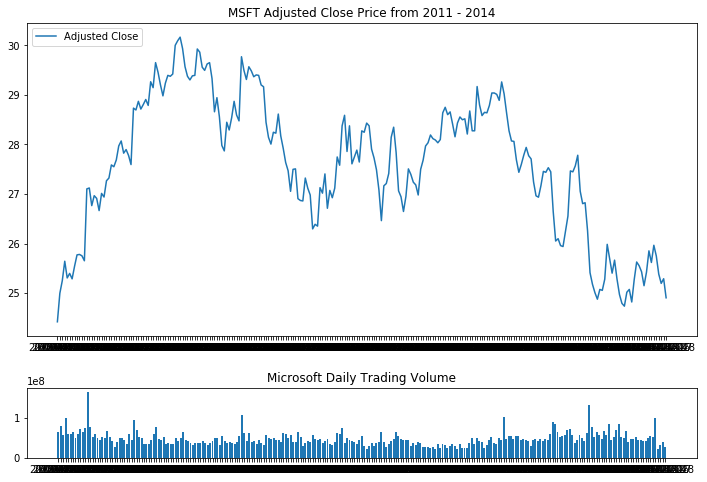

In [55]:
# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

## Plotting candlesticks

In [12]:
# subset to MSFT in Dec 2014
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] \
                 .reset_index() 
subset[:5]

        Date   Open   High    ...      Close    Volume  Adj Close
0 2014-12-01  47.88  48.78    ...      48.62  31191600      48.28
1 2014-12-02  48.84  49.05    ...      48.46  25743000      48.12
2 2014-12-03  48.44  48.50    ...      48.08  23534800      47.74
3 2014-12-04  48.39  49.06    ...      48.84  30320400      48.49
4 2014-12-05  48.82  48.97    ...      48.42  27313400      48.08

[5 rows x 7 columns]

In [13]:
# convert our dates matplotlib formatters representation
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] \
    .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High    ...       Volume  Adj Close  date_num
0 2014-12-01  47.88  48.78    ...     31191600      48.28    735568
1 2014-12-02  48.84  49.05    ...     25743000      48.12    735569
2 2014-12-03  48.44  48.50    ...     23534800      47.74    735570
3 2014-12-04  48.39  49.06    ...     30320400      48.49    735571
4 2014-12-05  48.82  48.97    ...     27313400      48.08    735572

[5 rows x 8 columns]

In [14]:
# extract only values required, in order, as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tuples[:5]

[(735568.0,
  47.880000000000003,
  48.780000000000001,
  47.710000000000001,
  48.619999999999997),
 (735569.0,
  48.840000000000003,
  49.049999999999997,
  48.200000000000003,
  48.460000000000001),
 (735570.0, 48.439999999999998, 48.5, 47.810000000000002, 48.079999999999998),
 (735571.0,
  48.390000000000001,
  49.060000000000002,
  48.200000000000003,
  48.840000000000003),
 (735572.0, 48.82, 48.969999999999999, 48.380000000000003, 48.420000000000002)]

In [15]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [16]:
# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

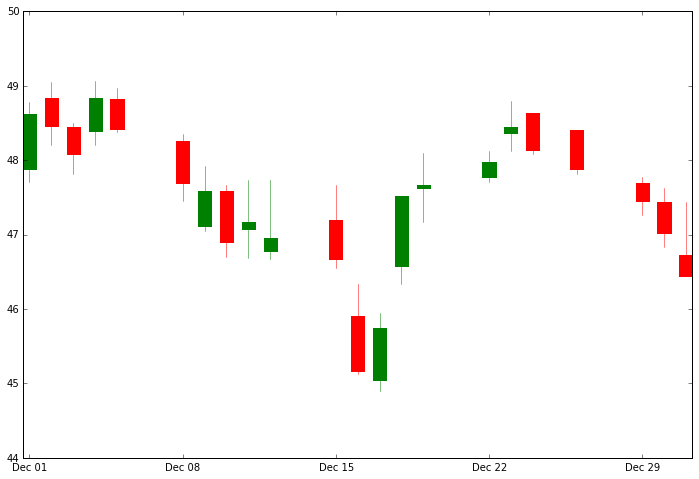

In [17]:
# now draw the plot
plt.figure(figsize(12,8))
fig, ax = plt.subplots()
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');
plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)

# Fundamental Financial Calculations

## Calculating daily percentage change

In [73]:
daily_close_px.head()

Ticker        AAPL    MSFT
Date                      
2012-01-03  55.414  24.422
2012-01-04  55.711  24.997
2012-01-05  56.330  25.252
2012-01-06  56.919  25.644
2012-01-09  56.829  25.307

In [74]:
# calc % change from day 0 to day 1
AA_p_t0 = daily_close_px.iloc[0]['AAPL']  #Pt-1
AA_p_t1 = daily_close_px.iloc[1]['AAPL']  #Pt
r_t1 = AA_p_t1 / AA_p_t0 - 1 # returns
AA_p_t0, AA_p_t1, r_t1 

(55.41362, 55.71143000000001, 0.005374310503446722)

In [75]:
# we can apply this to everything with the following using slices
dpc_1 = daily_close_px.iloc[1:] / \
        daily_close_px.iloc[:-1].values - 1
dpc_1.loc[:,'AAPL':'MSFT']

Ticker       AAPL   MSFT
Date                    
2012-01-04  0.005  0.024
2012-01-05  0.011  0.010
2012-01-06  0.010  0.016
2012-01-09 -0.002 -0.013
2012-01-10  0.004  0.004
...           ...    ...
2012-12-21 -0.005 -0.008
2012-12-24  0.002 -0.014
2012-12-26 -0.014 -0.007
2012-12-27  0.004  0.004
2012-12-28 -0.011 -0.015

[248 rows x 2 columns]

In [76]:
# show the DataFrame that is the numerator
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker        AAPL    MSFT
Date                      
2012-01-04  55.711  24.997
2012-01-05  56.330  25.252
2012-01-06  56.919  25.644
2012-01-09  56.829  25.307
2012-01-10  57.032  25.398

In [77]:
# the numerator is a 2-d array, but excludes the last day
daily_close_px.iloc[:-1].values

array([[55.41362, 24.42183],
       [55.71143, 24.99657],
       [56.32993, 25.25201],
       [56.9188 , 25.64429],
       [56.82851, 25.30675],
       [57.03199, 25.39797],
       [56.93901, 25.2885 ],
       [56.78269, 25.54394],
       [56.56979, 25.77201],
       [57.22872, 25.78113],
       [57.82297, 25.75376],
       [57.63971, 25.65341],
       [56.63581, 27.10394],
       [57.59389, 27.12219],
       [56.65064, 26.7664 ],
       [60.18785, 26.9671 ],
       [59.9143 , 26.91236],
       [60.27139, 26.66605],
       [61.04352, 27.01272],
       [61.51111, 26.93973],
       [61.47202, 27.26815],
       [61.32784, 27.32289],
       [61.94231, 27.58745],
       [62.52039, 27.55096],
       [63.17527, 27.68781],
       [64.23307, 27.97061],
       [66.45512, 28.07096],
       [66.4888 , 27.82465],
       [67.72582, 27.89763],
       [68.65021, 27.77825],
       [67.06149, 27.59459],
       [67.67327, 28.73327],
       [67.66114, 28.69654],
       [69.37652, 28.87102],
       [69.132

In [78]:
# or using the shift function
dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2.ix[:,0:2][:5]

d:\Users\renc\Anaconda3\envs\py36q\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Ticker       AAPL   MSFT
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.005  0.024
2012-01-05  0.011  0.010
2012-01-06  0.010  0.016
2012-01-09 -0.002 -0.013

In [79]:
# to make this easy, pandas has .pct_change() baked in
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

d:\Users\renc\Anaconda3\envs\py36q\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Ticker       AAPL   MSFT
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.005  0.024
2012-01-05  0.011  0.010
2012-01-06  0.010  0.016
2012-01-09 -0.002 -0.013

In [80]:
# set NaN's to 0 
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

d:\Users\renc\Anaconda3\envs\py36q\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Ticker       AAPL   MSFT
Date                    
2012-01-03  0.000  0.000
2012-01-04  0.005  0.024
2012-01-05  0.011  0.010
2012-01-06  0.010  0.016
2012-01-09 -0.002 -0.013

## Calculating simple daily cumulative returns

In [81]:
# calc the cumulative daily returns 
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

d:\Users\renc\Anaconda3\envs\py36q\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Ticker       AAPL   MSFT
Date                    
2012-01-03  1.000  1.000
2012-01-04  1.005  1.024
2012-01-05  1.017  1.034
2012-01-06  1.027  1.050
2012-01-09  1.026  1.036

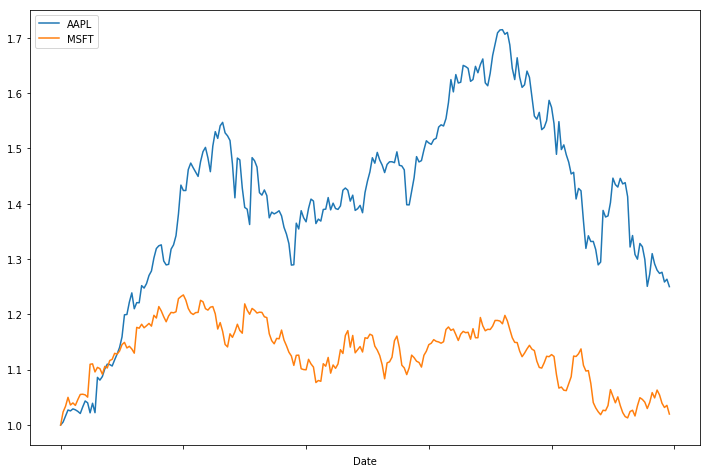

In [82]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
_ = plt.legend(loc=2);
plt.savefig('5104OS_05_08.png', bbox_inches='tight', dpi=300)

## Analyzing distribution of returns

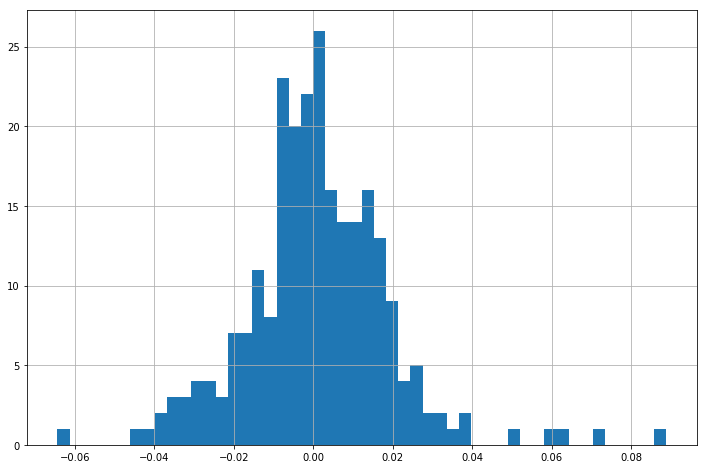

In [83]:
# plot daily % change values histogram for AAPL using 50 bins
aapl = daily_pct_change['AAPL']
_ = aapl.hist(bins=50, figsize=(12,8));
plt.savefig('5104OS_05_09.png', bbox_inches='tight', dpi=300)

In [84]:
# get descriptive statistics
aapl.describe()

count    2.490e+02
mean     1.064e-03
std      1.838e-02
min     -6.436e-02
25%     -7.972e-03
50%      2.707e-04
75%      1.165e-02
max      8.874e-02
Name: AAPL, dtype: float64

In [85]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    2.490e+02
mean     1.064e-03
std      1.838e-02
min     -6.436e-02
2.5%    -3.570e-02
50%      2.707e-04
97.5%    3.717e-02
max      8.874e-02
Name: AAPL, dtype: float64

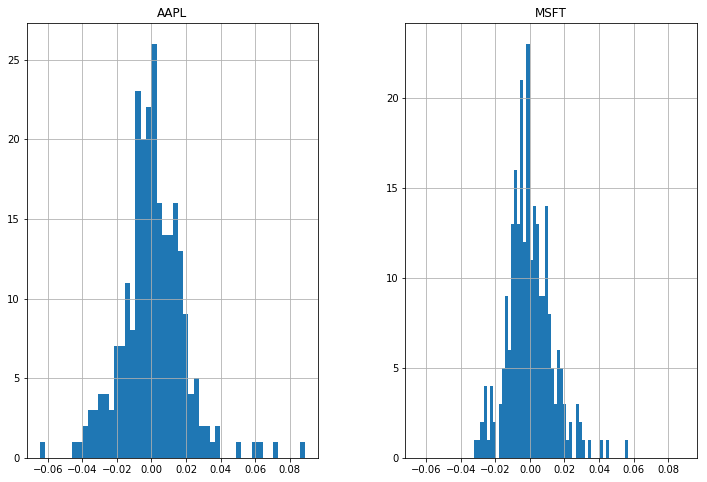

In [86]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('5104OS_05_10.png', bbox_inches='tight', dpi=300)

### QQ-Plots

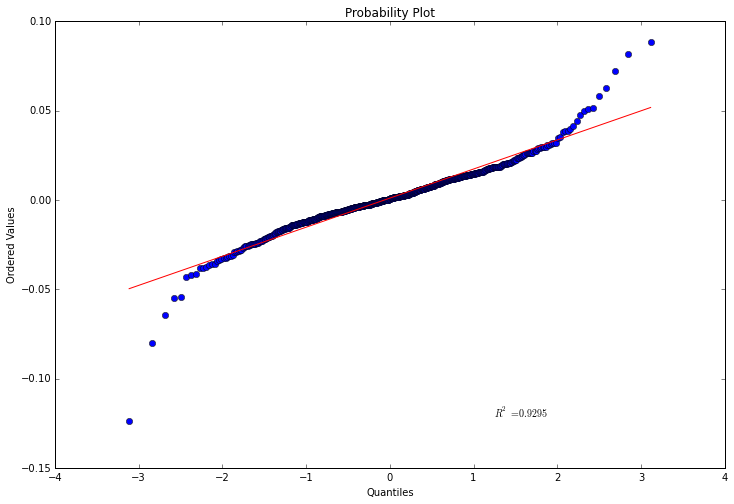

In [31]:
# create a qq-plot of AAPl returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();
plt.savefig('5104OS_05_11.png', dpi=300)

### Box and whisker plots

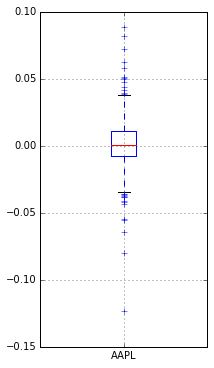

In [32]:
# create a box and whisker for the AAPL returns
_ = daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));
plt.savefig('5104OS_05_12.png', dpi=300)

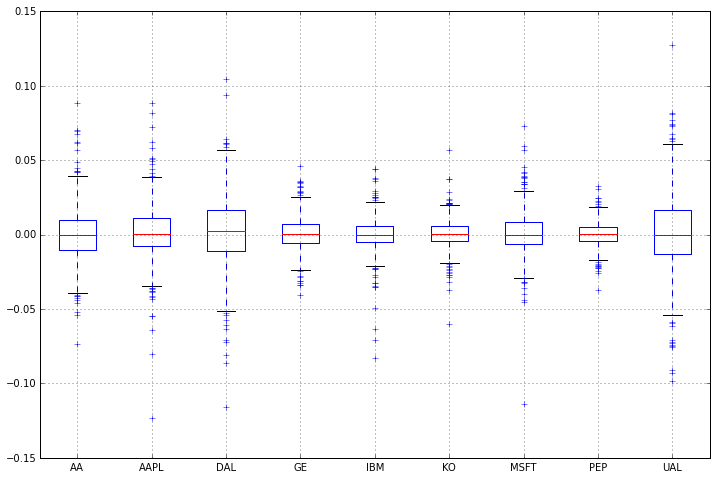

In [33]:
# examine all the returns 
daily_pct_change.plot(kind='box', figsize=(12,8));
plt.savefig('5104OS_05_13.png', dpi=300)

## Comparison of daily percentage change between stocks

In [34]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

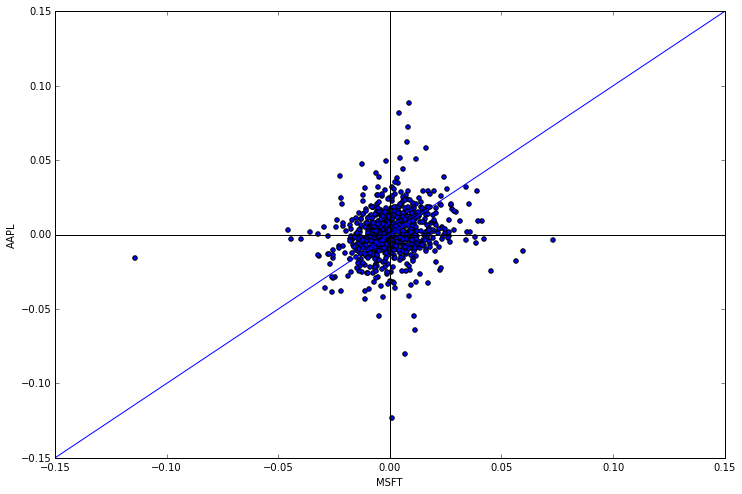

In [35]:
# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)
plt.savefig('5104OS_05_14.png', bbox_inches='tight', dpi=300)

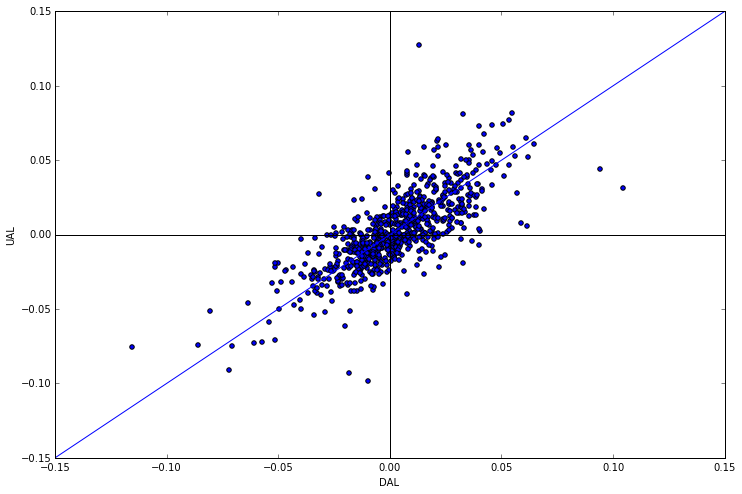

In [36]:
# DAL vs UAL
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)
plt.savefig('5104OS_05_15.png', bbox_inches='tight', dpi=300)

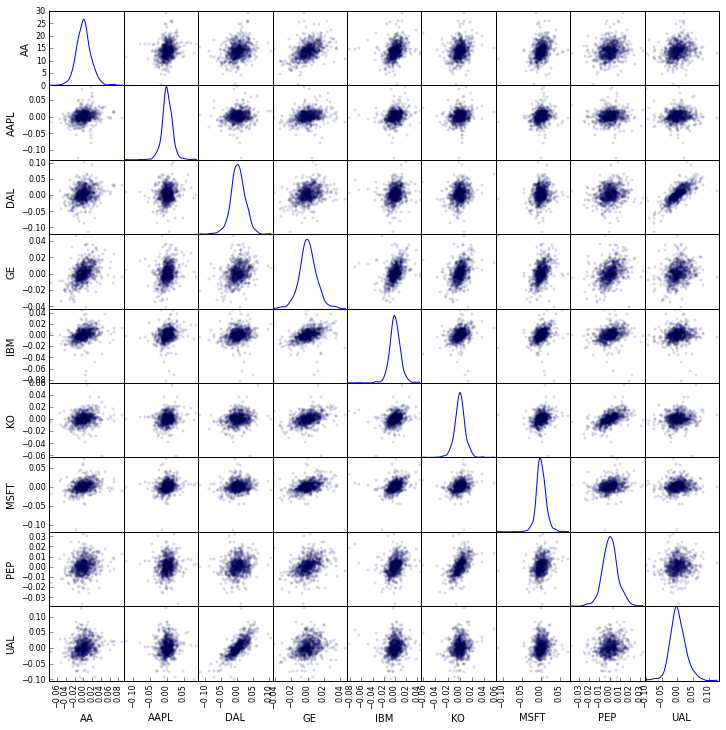

In [37]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
                      figsize=(12,12));
plt.savefig('5104OS_05_16.png', bbox_inches='tight', dpi=300)

## Moving Windows

In [38]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    24.42
2012-01-04    25.00
2012-01-05    25.25
2012-01-06    25.64
2012-01-09    25.31
Name: Adj Close, dtype: float64

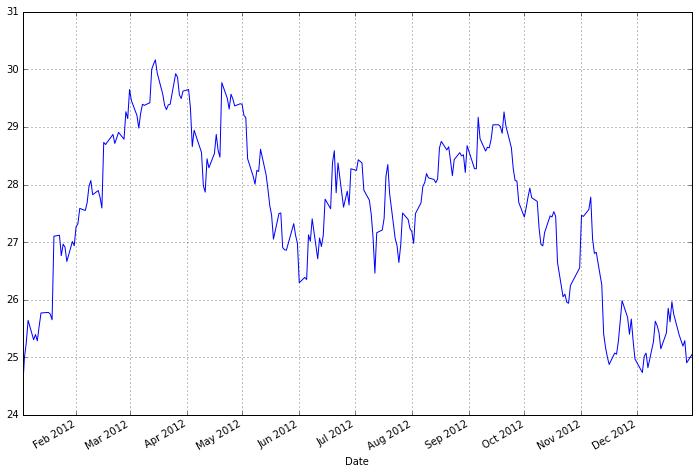

In [39]:
sample = msftAC['2012'] 
sample.plot(figsize=(12,8));
plt.savefig('5104OS_05_17.png', bbox_inches='tight', dpi=300)

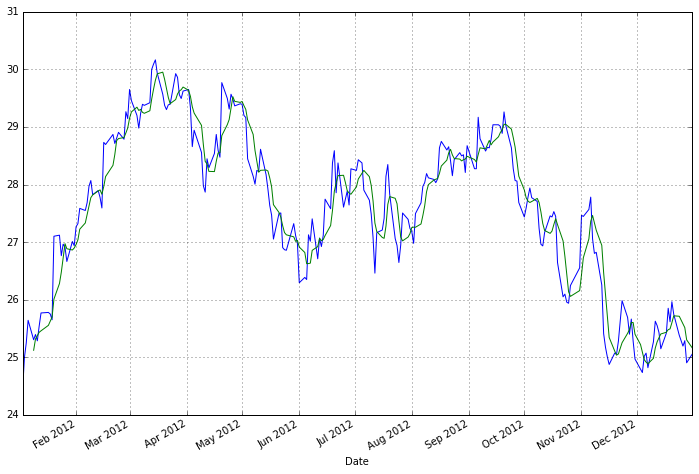

In [40]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));
plt.savefig('5104OS_05_18.png', bbox_inches='tight', dpi=300)

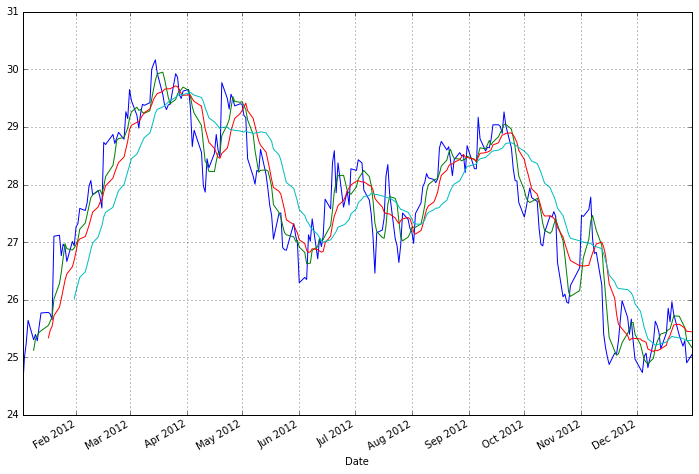

In [41]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));
plt.savefig('5104OS_05_19.png', bbox_inches='tight', dpi=300)

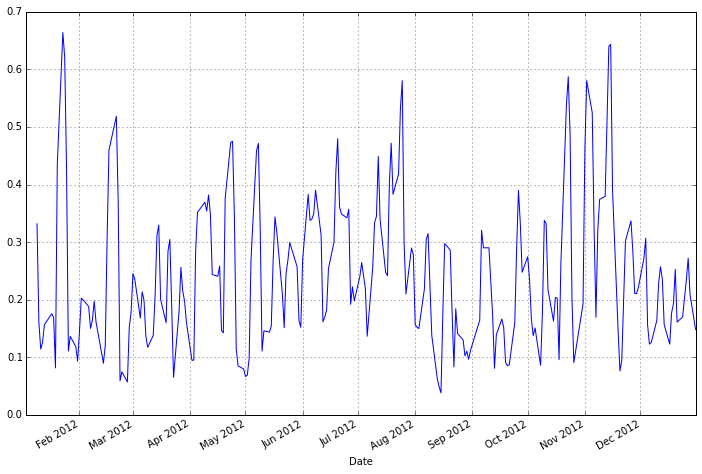

In [42]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));
plt.savefig('5104OS_05_20.png', bbox_inches='tight', dpi=300)

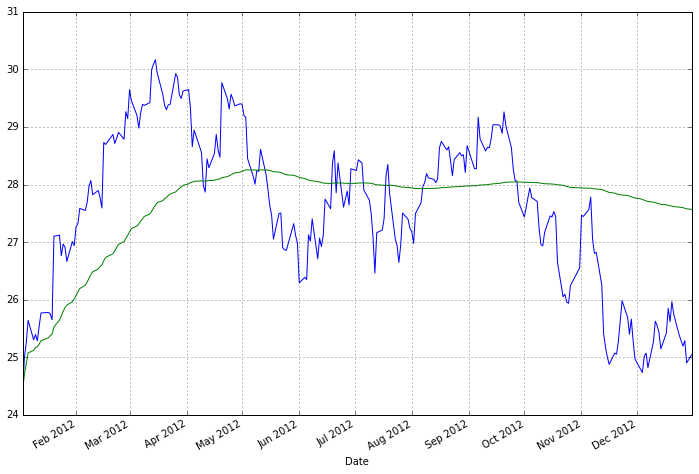

In [43]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), 
                                           min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot(figsize=(12,8));
plt.savefig('5104OS_05_21.png', bbox_inches='tight', dpi=300)

## Volatility calculation

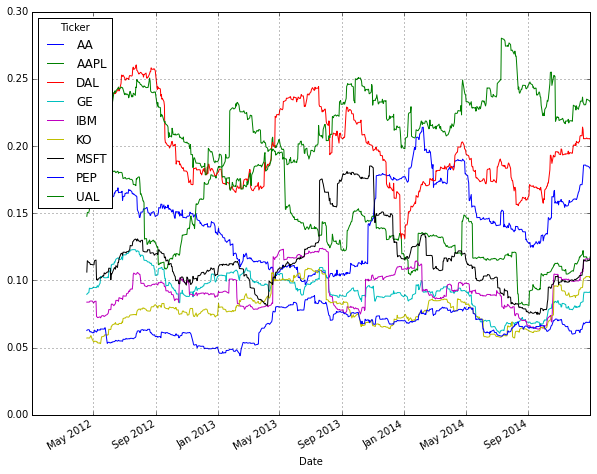

In [44]:
# use a minimum of 75 days
min_periods = 75
# calculate the rolling standard deviation
vol = pd.rolling_std(daily_pct_change, min_periods) * \
                     np.sqrt(min_periods)
# plot it
_ = vol.plot(figsize=(10, 8));
plt.savefig('5104OS_05_22.png', bbox_inches='tight', dpi=300)

## Rolling correlation of returns

In [45]:
# one year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'], 
                               daily_pct_change['MSFT'], 
                               window=252).dropna()
rolling_corr[251:] #first 251 are NaN

Date
2014-01-02    0.08
2014-01-03    0.08
2014-01-06    0.07
2014-01-07    0.07
2014-01-08    0.07
              ... 
2014-12-24    0.23
2014-12-26    0.23
2014-12-29    0.23
2014-12-30    0.23
2014-12-31    0.24
dtype: float64

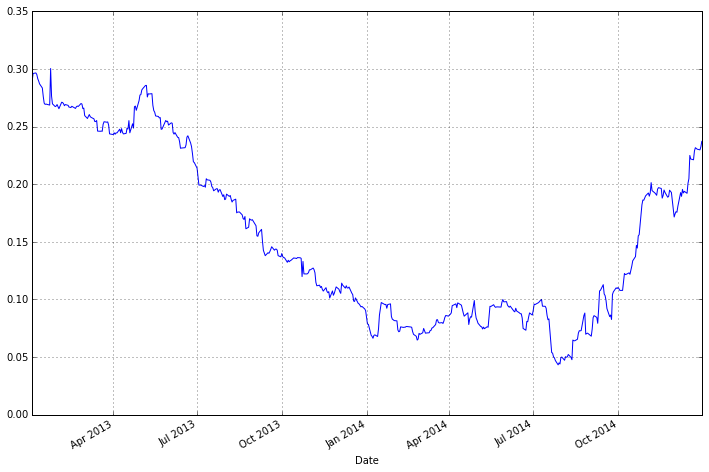

In [46]:
# plot the rolling correlation
_ = rolling_corr.plot(figsize=(12,8));
plt.savefig('5104OS_05_23.png', bbox_inches='tight', dpi=300)

## Least squares regression of returns (beta)

In [47]:
# least squares on the returns of AAPL and MSFT
model = pd.ols(y=daily_pct_change['AAPL'], 
               x={'MSFT': daily_pct_change['MSFT']}, 
               window=250)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [48]:
# what is the beta?
model.beta[0:5]

            MSFT  intercept
Date                       
2012-12-31  0.40          0
2013-01-02  0.41          0
2013-01-03  0.41          0
2013-01-04  0.42          0
2013-01-07  0.42          0

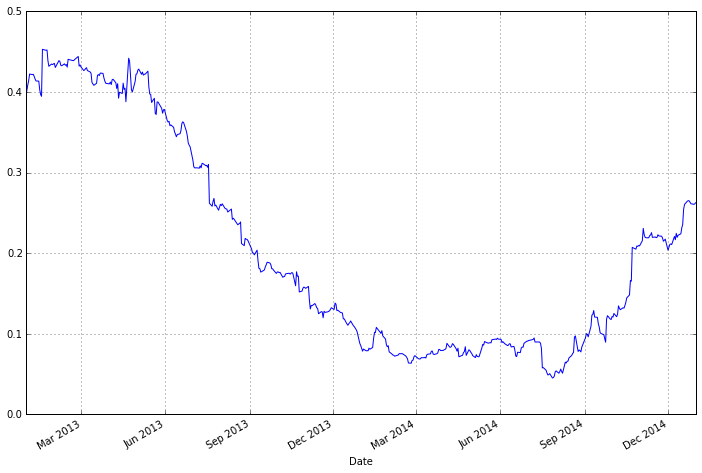

In [49]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)

# Comparing stocks to the S&P 500

In [50]:
# we need to calculate the pct change on the close for S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.00e+00
2012-01-04    1.88e-04
2012-01-05    2.94e-03
2012-01-06   -2.54e-03
2012-01-09    2.26e-03
Name: Adj Close, dtype: float64

In [51]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

               SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                              ...                   
2012-01-03  0.00e+00  0.00  0.00  ...   0.00  0.00  0.00
2012-01-04  1.88e-04  0.02  0.01  ...   0.02  0.01 -0.02
2012-01-05  2.94e-03 -0.01  0.01  ...   0.01 -0.01 -0.01
2012-01-06 -2.54e-03 -0.02  0.01  ...   0.02 -0.01 -0.01
2012-01-09  2.26e-03  0.03 -0.00  ...  -0.01  0.01 -0.02

[5 rows x 10 columns]

In [52]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500    AA  AAPL  ...   MSFT   PEP   UAL
Date                           ...                   
2012-01-03      1  1.00  1.00  ...   1.00  1.00  1.00
2012-01-04      1  1.02  1.01  ...   1.02  1.01  0.98
2012-01-05      1  1.01  1.02  ...   1.03  1.00  0.97
2012-01-06      1  0.99  1.03  ...   1.05  0.98  0.96
2012-01-09      1  1.02  1.03  ...   1.04  0.99  0.95

[5 rows x 10 columns]

In [53]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500    AA  AAPL  ...   MSFT   PEP   UAL
SP500   1.00  0.60  0.41  ...   0.54  0.52  0.32
AA      0.60  1.00  0.24  ...   0.31  0.23  0.22
AAPL    0.41  0.24  1.00  ...   0.19  0.09  0.06
DAL     0.42  0.25  0.14  ...   0.15  0.17  0.76
GE      0.73  0.46  0.24  ...   0.34  0.38  0.24
IBM     0.53  0.31  0.21  ...   0.36  0.26  0.12
KO      0.53  0.23  0.16  ...   0.27  0.56  0.14
MSFT    0.54  0.31  0.19  ...   1.00  0.28  0.13
PEP     0.52  0.23  0.09  ...   0.28  1.00  0.13
UAL     0.32  0.22  0.06  ...   0.13  0.13  1.00

[10 rows x 10 columns]

In [54]:
# how well did each stock relate to the S&P 500?
dpc_corrs.ix['SP500']

SP500    1.00
AA       0.60
AAPL     0.41
DAL      0.42
GE       0.73
IBM      0.53
KO       0.53
MSFT     0.54
PEP      0.52
UAL      0.32
Name: SP500, dtype: float64

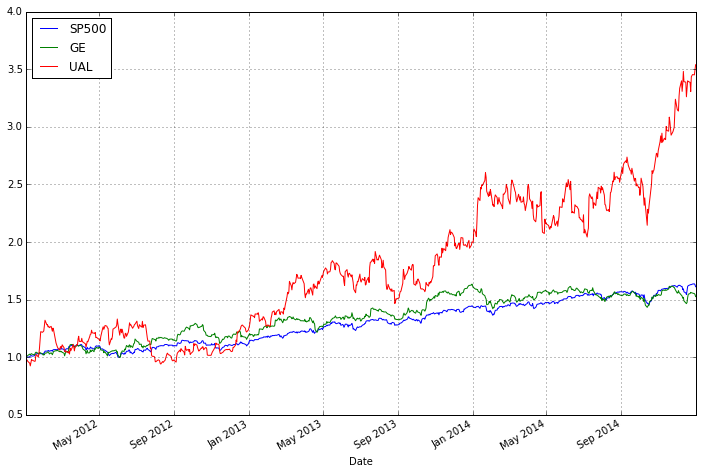

In [55]:
# plot GE/UAL against S&P500
_ = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));
plt.savefig('5104OS_05_25.png', bbox_inches='tight', dpi=300)

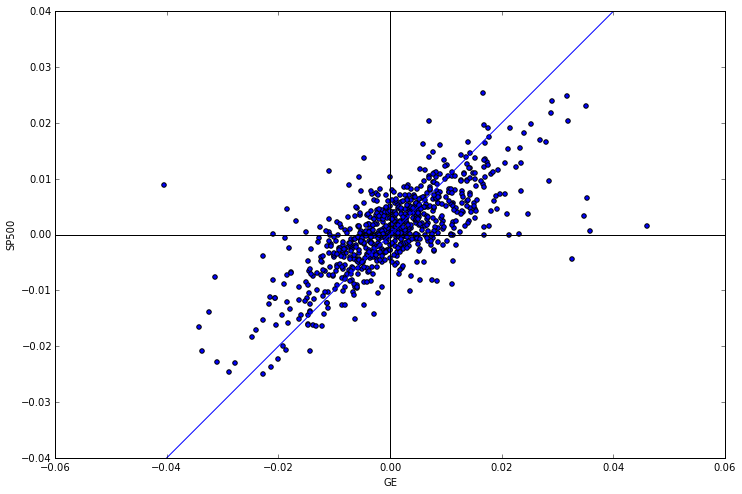

In [56]:
# GE vs S&P 500
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('5104OS_05_26.png', bbox_inches='tight', dpi=300)

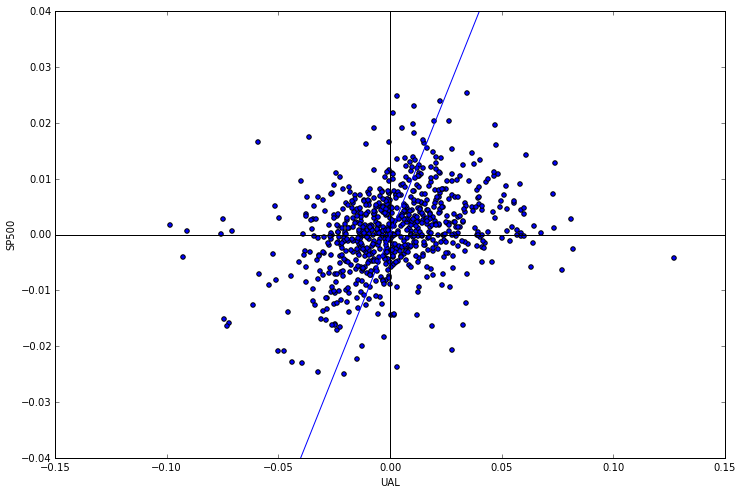

In [57]:
# and UAL vs S&P 500
render_scatter_plot(dpc_all, 'UAL', 'SP500')
plt.savefig('5104OS_05_27.png', bbox_inches='tight', dpi=300)